In [1]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-11-2022)' )

loaded gammapy version: 0.1.dev19174+g56b5bdf 
Supposed to be 1.0 (21-11-2022)


In [4]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
#get_ipython().system('jupyter nbconvert --to script 1-Nui_Par_Fitting.ipynb')
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map

from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets#, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    #PowerLawNuisanceSpectralModel,
    #PowerLawNormNuisanceSpectralModel
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys
sys.path.append('/home/katrin/Documents/nuisance_summary/')
sys.path.append('../')
from Dataset_Creation import sys_dataset
import Dataset_load 

## Read dataset

In [5]:

scale  = 0.05
scaled_amplitude = Parameter('amplitude',
                             value = 4.11e-11 * scale)
dataset_asimov  = Dataset_load.create_asimov(model = 'pl',
                                            parameters = Parameters([scaled_amplitude]))

update evaluator


## Single Cases

In [9]:
true_energy = dataset_asimov.exposure.geom.axes[0].center.value


shift_neg = -0.1
shift_pos = +0.1
shift_cor = 0.0

tilt_neg = -0.015
tilt_pos = 0.015
tilt_cor = 0


bias, resolution = 0,0
print(tilt_neg)

-0.015


In [10]:
sys_d_cor = sys_dataset(dataset_asimov= dataset_asimov,
                        shift = shift_cor, 
                        tilt = tilt_cor,
                        bias = bias,
                        resolution = resolution,
                        rnd = False,
                        e_reco_creation=10)
dataset_cor_N = sys_d_cor.create_dataset_N(10)

update evaluator


In [11]:
import json

def make_writeable(cc):
    d = dict()
    for ii, seg in enumerate(cc.allsegs[0]):
        d['x'] = seg[:,0].tolist()
        d['y'] = seg[:,1].tolist()
    return d

def save(c, name):
    d = make_writeable(c)
    with open(name, 'w') as f:
        json.dump(d, f)
        
def read(name):
    with open(name) as data_file:
        data_loaded = json.load(data_file)
    return data_loaded

## Standard 

update evaluator
OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 64
	total stat : 72468.14

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

CPU times: user 46.3 s, sys: 21.9 s, total: 1min 8s
Wall time: 1min 6s


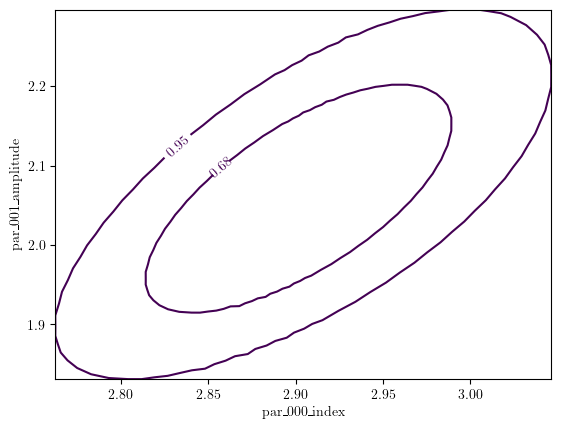

In [12]:
%%time
fit = Fit(store_trace=False)
minuit_opts = {"tol": 0.01, "strategy": 2}
fit.optimize_opts = minuit_opts
result = fit.run(datasets)
print(result)
fitting = False
if fitting :
    c = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.68, 
                                   size = 100, 
                                   )
    save(c, 'data/5_scan_68.json')
    c95 = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.95, 
                                   size = 100, 
                                   )
    save(c95, 'data/5_scan_95.json')
else:
    c = read('data/5_scan_68.json')
    c95 = read('data/5_scan_95.json')
      

## Nuisance Parameters

update evaluator
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf mode

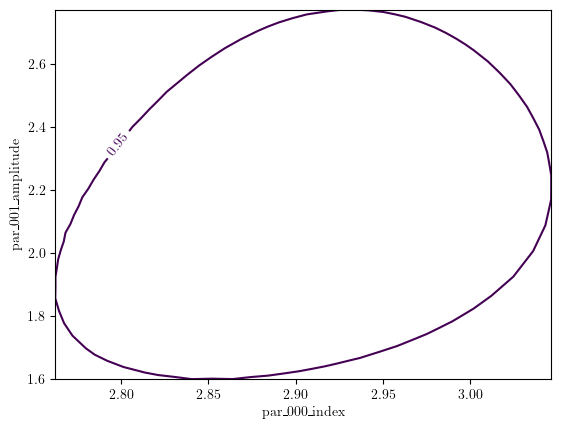

In [13]:
%%time
fitting_N = 1
if fitting_N:
    fit_N = Fit(store_trace=False)
    minuit_opts = {"tol": 0.1, "strategy": 2}
    fit_N.optimize_opts = minuit_opts
    result_N = fit_N.run(datasets_N)

    
    #c_N = fit_N.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
    #                           cl = 0.68, 
    #                          size = 100, 
    #                           interpolated = True,
    #                           )
    
    #save(c_N, 'data/5_scan_N_68.json')
    
    print("95")
    c95_N = fit_N.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                               cl = 0.95, 
                               size = 100, 
                                interpolated = True,
                               )
    save(c95_N, 'data/5_scan_N_95.json')
else:
    c_N = read('data/5_scan_N_68.json')
    c95_N = read('data/5_scan_N_95.json')
    path = f'data/2_model_nui_{shift}_tilt_{tilt}.yml'
    dataset_N_load = Dataset_load.load_dataset_N(dataset_N, path) 

# Stat Contours

In [14]:
color_standard = 'crimson'; color_standard_e = 'palevioletred'
color_nui = 'navy'; color_nui_e = 'cornflowerblue' # 'cornflowerblue'
color_rnd = 'darkgreen'
color_input = 'darkorange'
color_eff = 'darkgreen' ; color_eff_e = 'lightgreen'

Text(0, 0.5, 'Amplitude [1e-11 TeV-1 s-1 cm-2]')

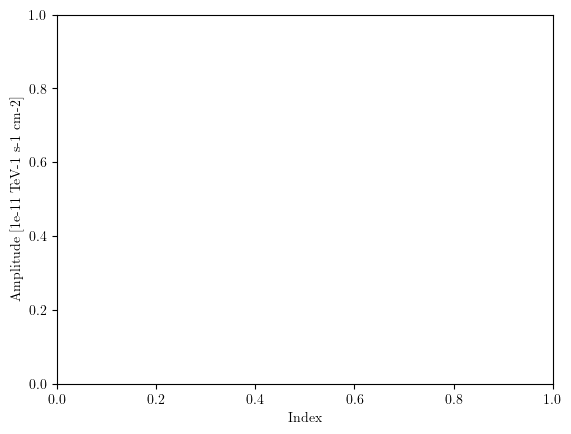

In [15]:
if not fitting and not fitting_N:

    factor = 0.1
    plt.figure()
    plt.plot(c['x'], np.array(c['y'])*factor, '.-', label='Standard 1$\sigma$', color = color_standard)
    plt.plot(c95['x'], np.array(c95['y'])*factor, '.-', label='Standard 2$\sigma$', color = color_standard_e)
    plt.plot(c_N['x'], np.array(c_N['y'])*factor, '.-', label='Effarea 1$\sigma$', color = color_eff)
    plt.plot(c95_N['x'], np.array(c95_N['y']), '.-', label='Effarea 2$\sigma$', color = color_eff_e)
    
    colors_best = [color_eff, color_standard]
    fmts = ['o', 'x']
    for j,d in enumerate([dataset_N_load, datasets]):
        i = d.models.parameters['index'].value
        a = d.models.parameters['amplitude'].value * 1e12
        
        plt.plot(i,a,  fmts[j], color = colors_best[int(j)], )
    
    plt.legend(fontsize=9, loc='best')
    
plt.xlabel("Index")
plt.ylabel("Amplitude [1e-11 TeV-1 s-1 cm-2]")

In [10]:
if fitting:# and fitting_N:

    plt.figure()
    for ii, seg in enumerate(c.allsegs[0]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=c.levels[ii], color = color_standard)
    for ii, seg in enumerate(c95.allsegs[0]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=c95.levels[ii], color = color_standard_e)    


    plt.legend(fontsize=9, loc='best')

In [11]:
if fitting_N:

    plt.figure()
    for ii, seg in enumerate(c_N.allsegs[0]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=c_N.levels[ii], color = color_standard)
    #for ii, seg in enumerate(c95.allsegs[0]):
    #    plt.plot(seg[:,0], seg[:,1], '.-', label=c95.levels[ii], color = color_standard_e)    


    plt.legend(fontsize=9, loc='best')

## Scan 1d

compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
9.999997473228739e-27
compute exposure
compute edisp
-1.0000002526771263e-26
compute exposure
compute edisp
9.999974732287377e-28
compute exposure
compute edisp
-1.0000025267712624e-27
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp
-2.5267712622372523e-33
compute exposure
compute edisp


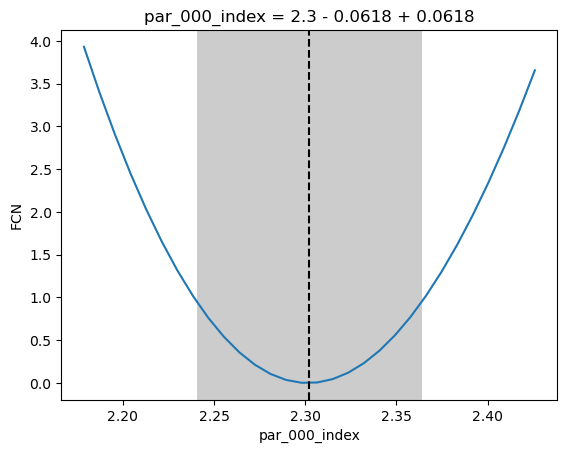

In [18]:
%%time
fitting_scan = True
if fitting_scan:
    fit_N = Fit(store_trace=False)
    minuit_opts = {"tol": 0.1, "strategy": 2}
    fit_N.optimize_opts = minuit_opts
    result_N = fit_N.run(datasets_N)
    scan_index_N = fit_N.minuit.draw_mnprofile("par_000_index");